In [0]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Flatten

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt


In [3]:
(x_train,y_train), (x_test,y_test)=mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


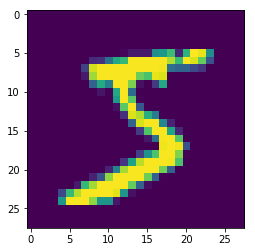

In [4]:
plt.imshow(x_train[0])

In [5]:
x_train[0].shape

(28, 28)

In [0]:
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)

In [0]:
from keras.utils import to_categorical

In [0]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [12]:
model=Sequential()

W0710 12:29:00.258531 140424616417152 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



In [13]:
model.add(Conv2D(64,kernel_size=3,activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(32,kernel_size=3,activation='relu'))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))

W0710 12:31:57.789774 140424616417152 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0710 12:31:57.801933 140424616417152 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        18464     
_________________________________________________________________
flatten_1 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                184330    
Total params: 203,434
Trainable params: 203,434
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

W0710 12:39:42.476229 140424616417152 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0710 12:39:42.507335 140424616417152 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [16]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=3)

W0710 12:42:19.667280 140424616417152 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0710 12:42:19.725244 140424616417152 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 16s 263us/step - loss: 0.3765 - acc: 0.9436 - val_loss: 0.0908 - val_acc: 0.9722
Epoch 2/3
60000/60000 [==============================] - 8s 138us/step - loss: 0.0614 - acc: 0.9810 - val_loss: 0.0779 - val_acc: 0.9752
Epoch 3/3
60000/60000 [==============================] - 8s 137us/step - loss: 0.0425 - acc: 0.9867 - val_loss: 0.0783 - val_acc: 0.9790


In [0]:
arr=model.predict(x_test[:4])

In [0]:
highest=max(arr[0])

In [0]:
import numpy as np

In [0]:
i,j=np.where(arr==highest)

In [27]:
i,j

(array([0]), array([7]))

In [28]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

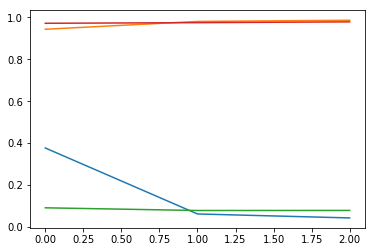

In [33]:
plt.plot(history.epoch, history.history['loss'], 
        history.epoch, history.history['acc'], 
        history.epoch, history.history['val_loss'],
        history.epoch, history.history['val_acc'])

In [34]:
model.evaluate(x_test,y_test)

10000/10000 [==============================] - 1s 65us/step


[0.07828529935693805, 0.979]